In [1]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization

In [2]:
trainDataGen = ImageDataGenerator(
		rotation_range = 5,
		width_shift_range = 0.1,
		height_shift_range = 0.1,
		rescale = 1.0/255,
		shear_range = 0.2,
		zoom_range = 0.2,		
		horizontal_flip = False,
		fill_mode = 'nearest')

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
trainGenerator = trainDataGen.flow_from_directory(
			"/home/mayank/Downloads/tamil_dataset_character/Train",
			target_size = (32,32),
			batch_size = 32,
			color_mode = "grayscale",
			class_mode = "categorical")

Found 63024 images belonging to 156 classes.


In [4]:
prev = ""
labels = []
for x in range(0,156):
    labels.append(str(x))
count = 0;

In [5]:
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155']


In [6]:
validation_generator = test_datagen.flow_from_directory(
			"/home/mayank/Downloads/tamil_dataset_character/Test",
			target_size=(32,32),
			batch_size=32,
			color_mode = "grayscale",
			class_mode= 'categorical')
			
model = Sequential()

Found 11544 images belonging to 156 classes.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          1

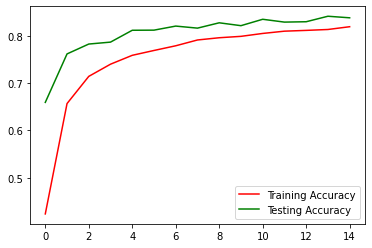

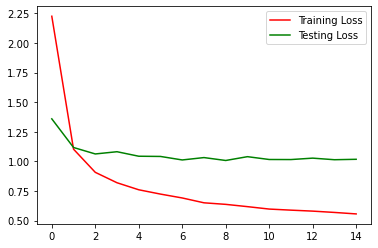

In [7]:
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(BatchNormalization())
#model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#Layer2-------------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())
#model.add(MaxPooling2D())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
#model.add(Dropout(0.25))


#Layers 3-----------------------------------------------------------	
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layer 4--------------------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))			
			
#model.add(Dropout(0.2))


#Layer 5------------------------------------------------------------
'''model.add(Convolution2D(filters = 64,
			kernel_size = (2,2),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))'''


model.add(Flatten())

model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

model.add(Dense(156,
		activation = "softmax",
		kernel_initializer = "uniform"))			
			
model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
		
print(model.summary())

res=model.fit_generator(
		trainGenerator,
		epochs = 15,
		steps_per_epoch = 1970,
		validation_data = validation_generator,
		validation_steps = 361
		)

%matplotlib inline
accu=res.history['accuracy']
val_acc=res.history['val_accuracy']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()